In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv(r"C:\Users\nivet\Downloads\cereals\cereal.csv")

In [74]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [75]:
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [76]:
data.duplicated().sum()

0

In [77]:
# There are no null values as null values are encoded as -1 in the data set
(data == -1).sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [78]:
# replacing with Nans first beacuse when mean is calculated -1 is also taken into account
data.replace(-1, np.nan)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


In [81]:
for col in ['carbo','sugars','potass']:
    data[col] = data[col].fillna(data[col].mean())

In [82]:
# finding total null values
data.isna().sum().sum()

0

In [83]:
data.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [85]:
print('The total number of rows are '+str(data.shape[0]))
print('The total number of rows are '+str(data.shape[1]))

The total number of rows are 77
The total number of rows are 16


## Data Viz

<AxesSubplot:>

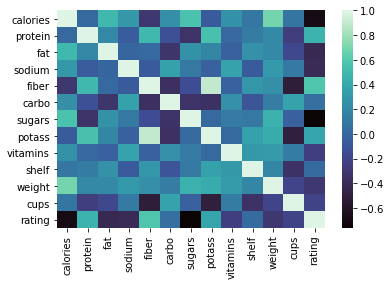

In [86]:
corr = data.corr()
sns.heatmap(data = corr, cmap = 'mako')

Findings: The rating is positively correlated with fiber, protein and potassium

In [87]:
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [88]:
data = data.rename(columns={"mfr": "manufacturer", "type": "serving_type", "potass":"potassium", 'carbo': 'carbohydrates'})
manufacturers = {
    'A' : 'American Home Food Products',
    'G' : 'General Mills',
    'K' : 'Kelloggs',
    'N' : 'Nabisco',
    'P' : 'Post',
    'Q' : 'Quaker Oats',
    'R' : 'Ralston Purina',
 }
serving_types = {
    'C': 'cold',
    'H': 'hot',
}

def change_value(data,list_items,column_name):
    for index, value in list_items.items():
        data.loc[data[column_name] == index, column_name] = value
    return data

data = change_value(data,manufacturers,'manufacturer')

data = change_value(data,serving_types,'serving_type')


In [89]:
data.head()

,name,manufacturer,serving_type,calories,protein,fat,sodium,fiber,carbohydrates,sugars,potassium,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,cold,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Quaker Oats,cold,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,Kelloggs,cold,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,cold,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,Ralston Purina,cold,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


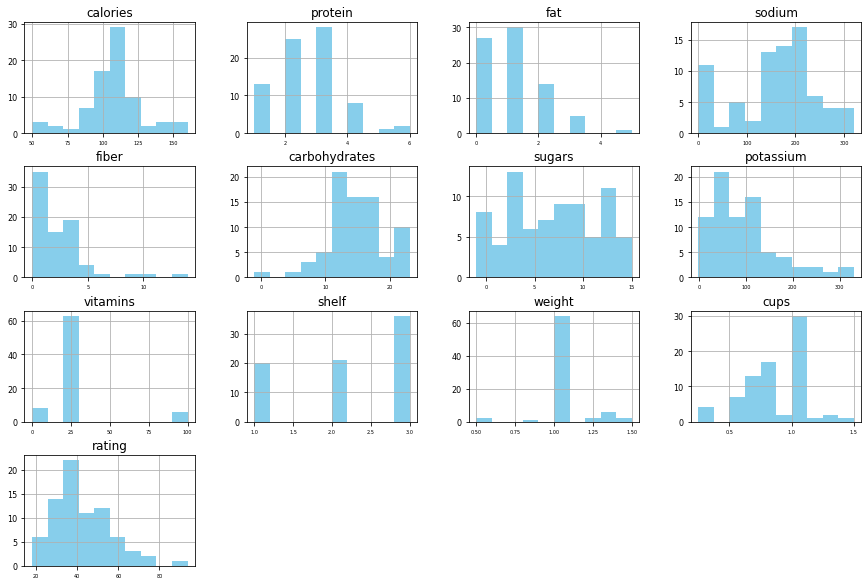

In [102]:
# Overall distribution of each attribute
data.hist(figsize=(15, 10), bins=10, xlabelsize=5, ylabelsize=8, color='skyblue');

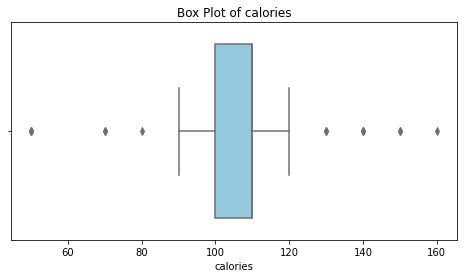

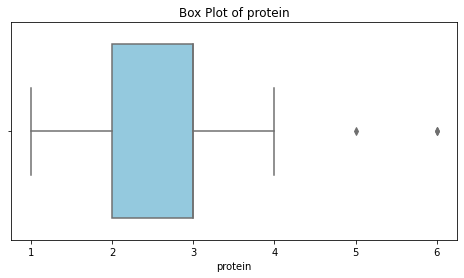

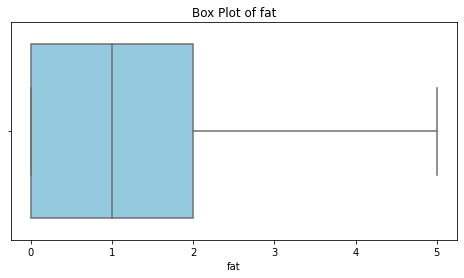

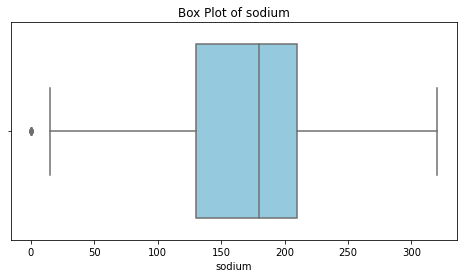

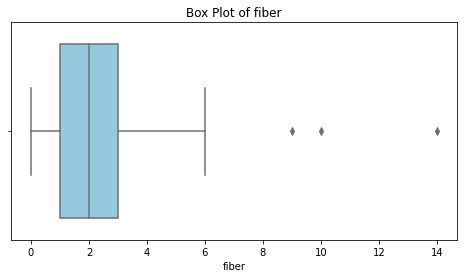

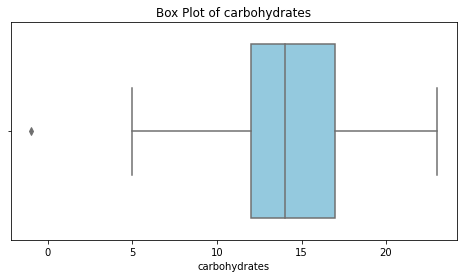

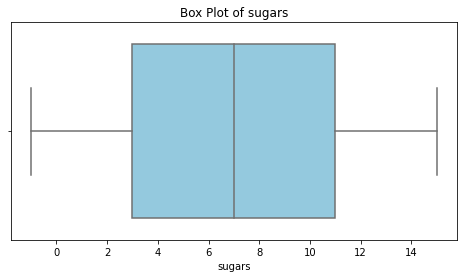

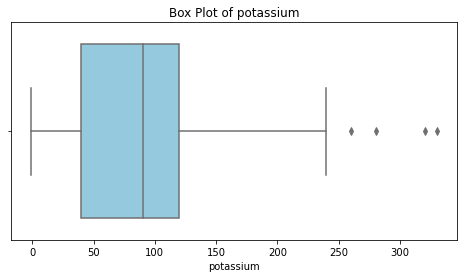

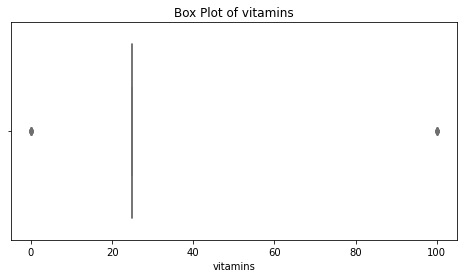

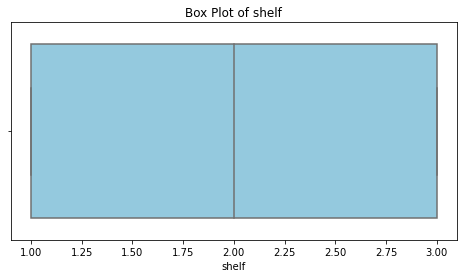

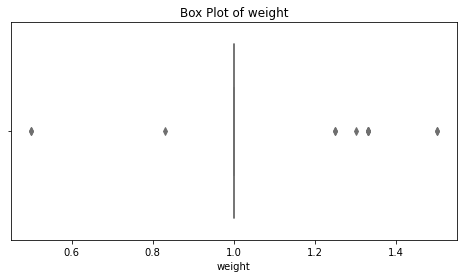

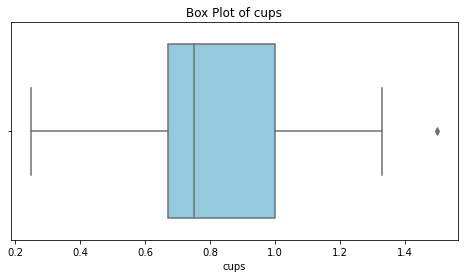

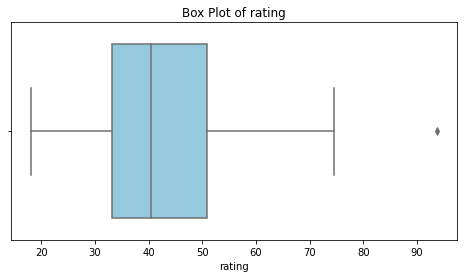

In [103]:
columns_to_plot = data.drop(['name','manufacturer','serving_type'], axis = 1)
color = ['skyblue']
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    plt.title(f'Box Plot of {col}')
    sns.boxplot(data=data, x=col, palette = color)
    plt.show()

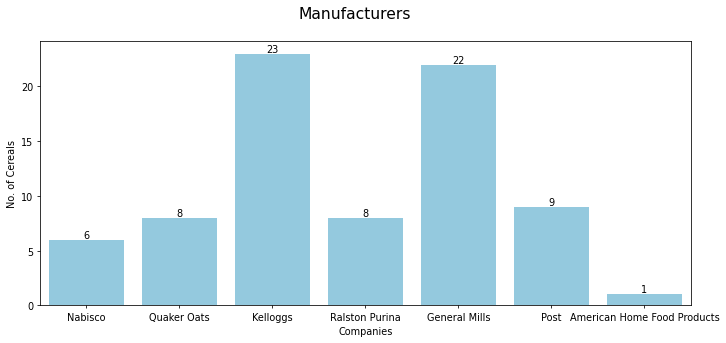

In [92]:
companies = get_observations(data,'manufacturer')
product_count = count_observations(companies,data,'manufacturer')

fig = plt.figure(figsize=(12,5), dpi=70)
fig.suptitle('Manufacturers',fontsize=16)
plots = sns.barplot(y = product_count,x = companies, color='skyblue')
plt.xlabel('Companies')
plt.ylabel('No. of Cereals')

for i, v in enumerate(product_count):
    plt.text(i, v, str(v), ha='center', va='bottom')

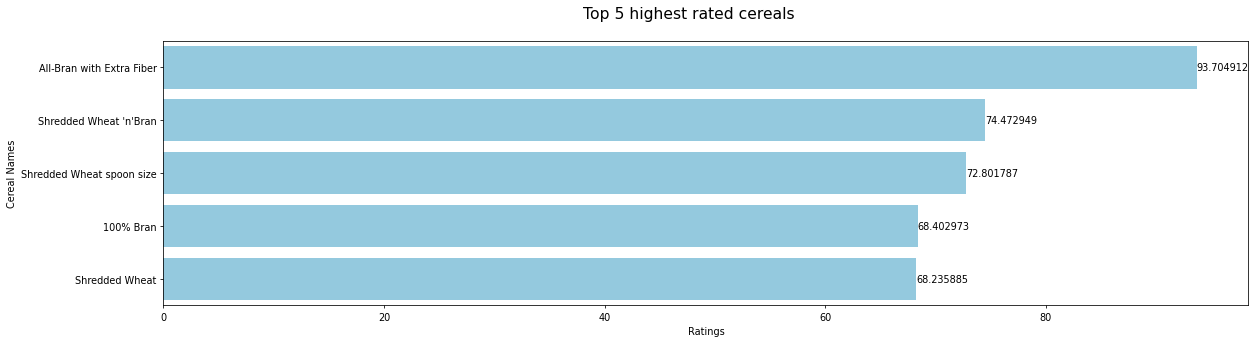

In [93]:
data_top_rating = data.sort_values('rating', ascending=False)
data_top_rating = data_top_rating.head(5)

fig = plt.figure(figsize=(20,5), dpi=70)
fig.suptitle('Top 5 highest rated cereals',fontsize=16)
plots = sns.barplot(y = data_top_rating['name'],x = data_top_rating['rating'], color='skyblue')
plt.xlabel('Ratings')
plt.ylabel('Cereal Names')

for i, v in enumerate(data_top_rating['rating']):
    plt.text(v, i, str(v), ha='left', va='center')

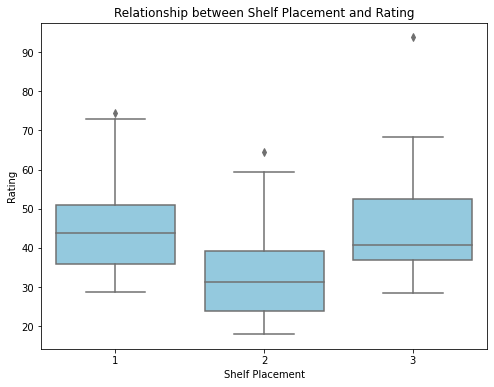

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['skyblue']  
# Box plot of rating by shelf placement with the specified color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='shelf', y='rating', palette=colors)
plt.xlabel('Shelf Placement')
plt.ylabel('Rating')
plt.title('Relationship between Shelf Placement and Rating')
plt.show()


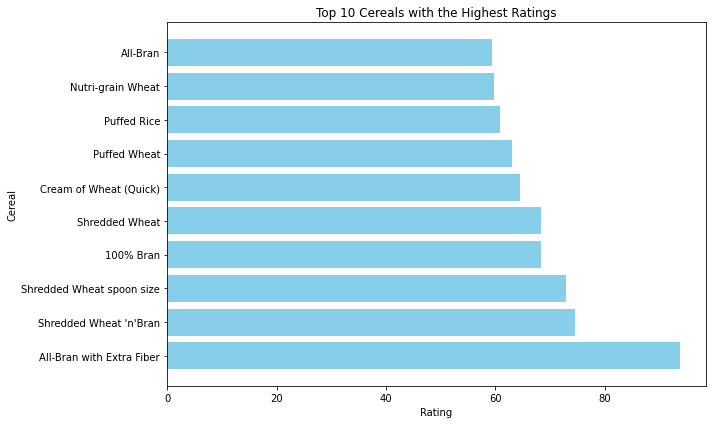

In [95]:
# Select the top 10 cereals with the highest ratings
top_10_cereals = data.nlargest(10, 'rating')

# Create a horizontal bar chart with color set to 'powderblue'
plt.figure(figsize=(10, 6))
plt.barh(top_10_cereals['name'], top_10_cereals['rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Top 10 Cereals with the Highest Ratings')
plt.tight_layout()
plt.show()


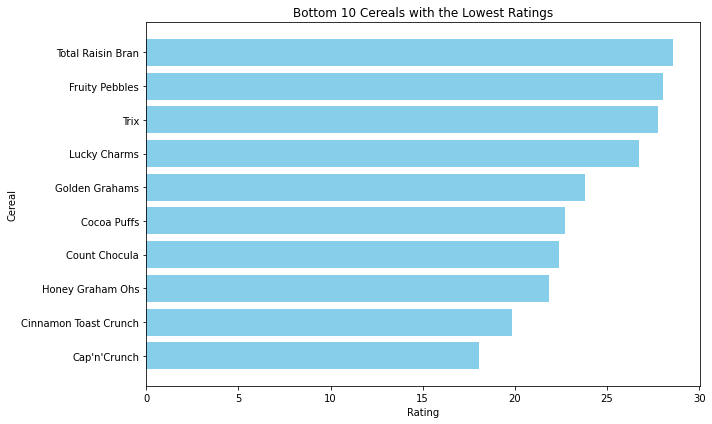

In [96]:
# Select the bottom 10 cereals with the lowest ratings
bottom_10_cereals = data.nsmallest(10, 'rating')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(bottom_10_cereals['name'], bottom_10_cereals['rating'],color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Cereal')
plt.title('Bottom 10 Cereals with the Lowest Ratings')
plt.tight_layout()
plt.show()

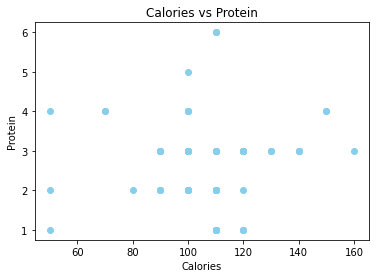

In [97]:
plt.scatter(data['calories'], data['protein'], color = 'skyblue')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Calories vs Protein')
plt.show()

In [98]:
data.columns

Index(['name', 'manufacturer', 'serving_type', 'calories', 'protein', 'fat',
       'sodium', 'fiber', 'carbohydrates', 'sugars', 'potassium', 'vitamins',
       'shelf', 'weight', 'cups', 'rating'],
      dtype='object')

<Figure size 2160x720 with 0 Axes>

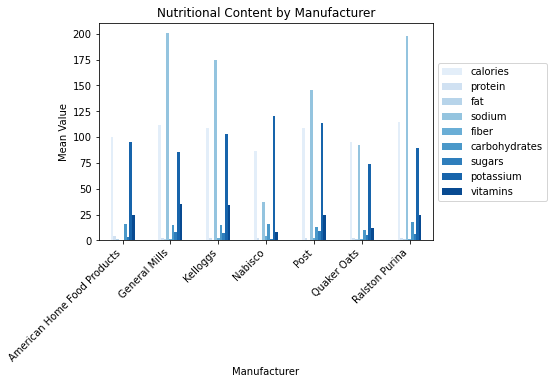

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data, nutritional_factors, manufacturer_labels, and mean_values already defined

# Set the color palette to shades of blue
blue_palette = sns.color_palette("Blues", n_colors=len(nutritional_factors))

# Create the grouped bar plot with shades of blue
plt.figure(figsize=(30, 10))
ax = mean_values.plot(kind='bar', color=blue_palette)
plt.xlabel('Manufacturer')
plt.ylabel('Mean Value')
plt.title('Nutritional Content by Manufacturer')
ax.legend(nutritional_factors, loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend to the right
plt.xticks(range(len(manufacturer_labels)), manufacturer_labels, rotation='horizontal')
plt.xticks(rotation=45, ha='right')
plt.show()


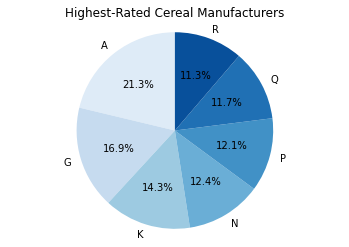

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have your data and highest_rating already defined

# Set the color palette to shades of blue
blue_palette = sns.color_palette("Blues", n_colors=len(manufacturers))

# Create a pie chart with shades of blue
plt.pie(ratings, labels=manufacturers, autopct='%1.1f%%', startangle=90, colors=blue_palette)

# Set the title of the pie chart
plt.title('Highest-Rated Cereal Manufacturers')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the pie chart
plt.show()


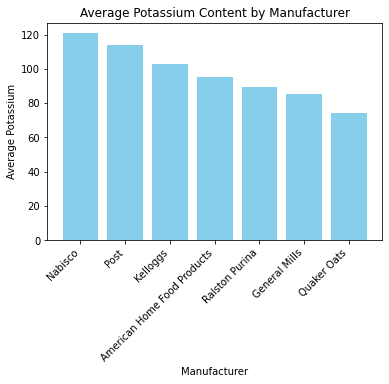

In [101]:
# Calculate the average potassium for each manufacturer
avg_potassium = data.groupby('manufacturer')['potassium'].mean().reset_index()

# Sort the data by potassium in descending order
avg_potassium = avg_potassium.sort_values('potassium', ascending=False)

# Plot the average potassium values
plt.bar(avg_potassium['manufacturer'], avg_potassium['potassium'], color = 'skyblue')

# Add labels and title
plt.xlabel('Manufacturer')
plt.ylabel('Average Potassium')
plt.title('Average Potassium Content by Manufacturer')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()